# <u>**Final Project: Diabetes Health Indicators Classification </u>**
## G. Jake Manning  |  CSCA 5622 - Spring 2025 Session 1  |  https://github.com/jman102/CSCA5622-Final-Project

##### Imports

In [35]:
# Import all modules that will be needed in this notebook
import pandas as pd
import numpy as np
from ucimlrepo import fetch_ucirepo
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score, classification_report, confusion_matrix
%matplotlib inline 

### Problem Description

I am going to look at a cleaned version of a 2015 Centers for Disease Control and Prevention (CDC) dataset where the goal was to better understand the relationship between lifestyle and diabetes in the United States and Puerto Rico. The data indicates whether or not a given respondent is pre-diabetic or has diabetes as 1, or if they do not have diabetes, indicated as 0. Ultimately this is a binary classification problem; if based on the features a person is pre-diabetic/diabetic or if they are not.

### Exploratory Data Analysis (EDA)

To start, let's pull the CDC Diabetes Health Indicators data from the UC Irvine Machine Learning Repository. They have a super convenient module where you can fetch the data by a repo id and load features and targets straight into pandas dataframes. Most sources of data are not like this. But for a beginner project, I feel like data retrieval is not the emphasis, so I'll use the nice resources available.

In [3]:
# fetch dataset | CDC Diabetes Health Indicators
# url - https://archive.ics.uci.edu/dataset/891/cdc+diabetes+health+indicators
cdc_diabetes_health_indicators = fetch_ucirepo(id=891) 
  
# data (as pandas dataframes) 
X = cdc_diabetes_health_indicators.data.features 
y = cdc_diabetes_health_indicators.data.targets 
  
# metadata 
# print(cdc_diabetes_health_indicators.metadata) 
  
# variable information 
print(cdc_diabetes_health_indicators.variables)

                    name     role     type      demographic  \
0                     ID       ID  Integer             None   
1        Diabetes_binary   Target   Binary             None   
2                 HighBP  Feature   Binary             None   
3               HighChol  Feature   Binary             None   
4              CholCheck  Feature   Binary             None   
5                    BMI  Feature  Integer             None   
6                 Smoker  Feature   Binary             None   
7                 Stroke  Feature   Binary             None   
8   HeartDiseaseorAttack  Feature   Binary             None   
9           PhysActivity  Feature   Binary             None   
10                Fruits  Feature   Binary             None   
11               Veggies  Feature   Binary             None   
12     HvyAlcoholConsump  Feature   Binary             None   
13         AnyHealthcare  Feature   Binary             None   
14           NoDocbcCost  Feature   Binary             

This is a clean dataset of 253,680 survey responses. The target variable Diabetes_binary has 2 classes. 0 is for no diabetes, and 1 for prediabetes or diabetes. This dataset has 21 feature variables.

In [4]:
X.describe()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,0.811420,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,0.391175,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [5]:
y.describe()

,Diabetes_binary
count,253680.000000
mean,0.139333
std,0.346294
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


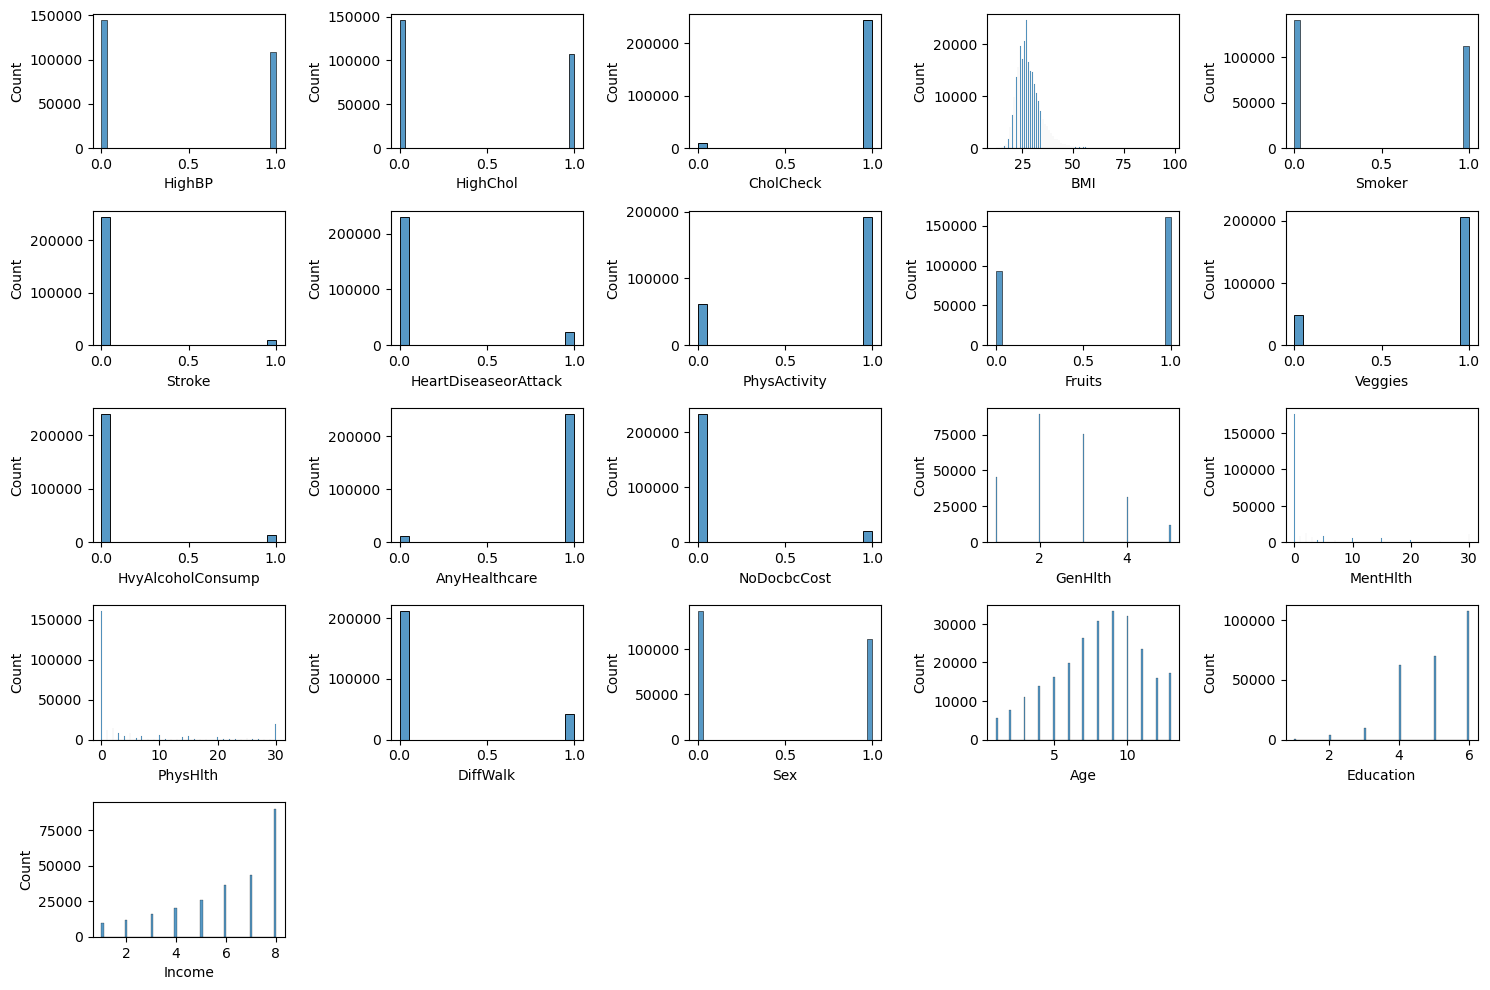

In [6]:
# Create a histogram for each feature
plt.figure(figsize=(15, 10))
for i, feature in enumerate(X.columns):
    plt.subplot(5, 5, i + 1)
    sns.histplot(X[feature])
    plt.tight_layout()
plt.show()

In [7]:
y = y.squeeze() # need to convert y from a dataframe to a 1-d array

### Analysis: Model Building & Training

For this classification problem, there were a handful of supervised machine learning techniques that we learned in this course that could be useful. My approach is to try a few different techniques and then compare results in later sections of this notebook. The models I explored were Logistic Regression, Random Forest, and Gradient Boosting.

In [8]:
class Data:
    """
    class to setup training/testing splits
    
    """
    def __init__(self):
        self.X_train = None 
        self.X_test = None 
        self.y_train = None 
        self.y_test = None
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(X, y, test_size=0.2, stratify=y)
        
data = Data()

##### Logistic Regression Binary Classifier

In [9]:
class LR_data:
    def __init__(self):
        self.y_pred = None
        self.y_prob = None
        self.cm = None

lr_data = LR_data()

# logicstic regression
lr_clf = LogisticRegression(max_iter=1000).fit(data.X_train, data.y_train)

##### Random Forest Binary Classifier

In [10]:
class RF_data:
    def __init__(self):
        self.y_pred = None
        self.y_prob = None
        self.cm = None
        
rf_data = RF_data()

# random forest
rf_clf = RandomForestClassifier(random_state=42).fit(data.X_train, data.y_train)

##### Gradient Boosting Binary Classifier

In [11]:
class GB_data:
    def __init__(self):

        self.y_pred = None
        self.y_prob = None
        self.cm = None
        
gb_data = GB_data()

# gradient boosting
gb_clf = GradientBoostingClassifier(random_state=42).fit(data.X_train, data.y_train)

### Results

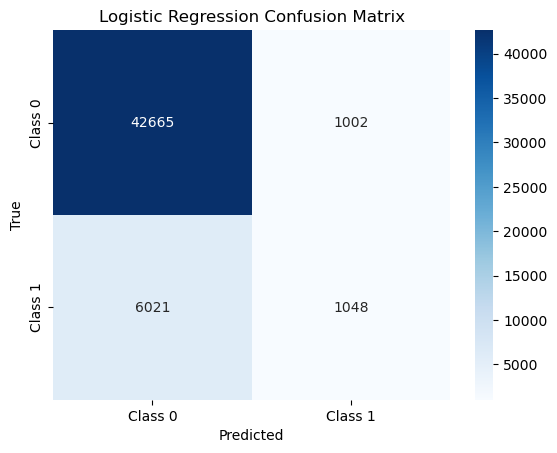

In [34]:
lr_data.y_pred = lr_clf.predict(data.X_test)

# Confusion Matrix
lr_data.cm = confusion_matrix(data.y_test, lr_data.y_pred)

# Plot Confusion Matrix
sns.heatmap(lr_data.cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Logistic Regression Confusion Matrix')
plt.show()

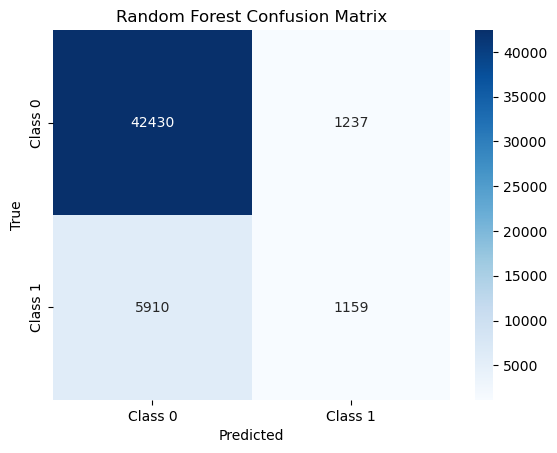

In [33]:
rf_data.y_pred = rf_clf.predict(data.X_test)

# Confusion Matrix
rf_data.cm = confusion_matrix(data.y_test, rf_data.y_pred)

# Plot Confusion Matrix
sns.heatmap(rf_data.cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Random Forest Confusion Matrix')
plt.show()

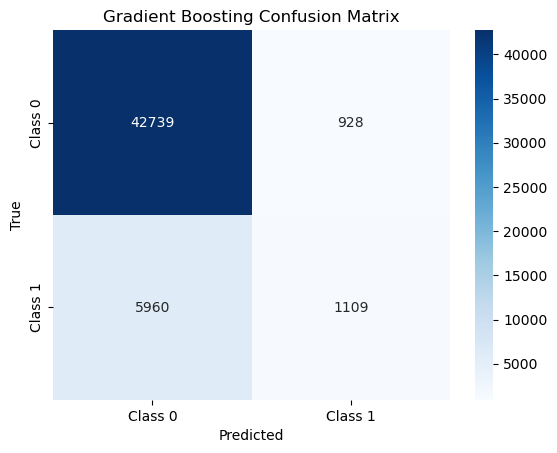

In [32]:
gb_data.y_pred = gb_clf.predict(data.X_test)

# Confusion Matrix
gb_data.cm = confusion_matrix(data.y_test, gb_data.y_pred)

# Plot Confusion Matrix
sns.heatmap(gb_data.cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Gradient Boosting Confusion Matrix')
plt.show()

##### Model Comparison

In [28]:
# Evaluate models using different metrics
def evaluate_model(model_name, y_test, predictions):
    print(f"{model_name} Classification Report:")
    print(classification_report(y_test, predictions))
    print("-" * 60)


# Evaluate each model
evaluate_model("Logistic Regression", data.y_test, lr_data.y_pred)
evaluate_model("Random Forest", data.y_test, rf_data.y_pred)
evaluate_model("Gradient Boosting", data.y_test, gb_data.y_pred)

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.98      0.92     43667
           1       0.51      0.15      0.23      7069

    accuracy                           0.86     50736
   macro avg       0.69      0.56      0.58     50736
weighted avg       0.83      0.86      0.83     50736

------------------------------------------------------------
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.97      0.92     43667
           1       0.48      0.16      0.24      7069

    accuracy                           0.86     50736
   macro avg       0.68      0.57      0.58     50736
weighted avg       0.82      0.86      0.83     50736

------------------------------------------------------------
Gradient Boosting Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.98      0.93     

##### Cross-Validation

In [25]:
# Cross-validation for each model
def cross_validate_model(model_name, model, X, y):
    scores = cross_val_score(model, X, y, cv=5, scoring="accuracy")
    print(f"{model_name} Cross-validated Accuracy: {np.mean(scores):.4f} ± {np.std(scores):.4f}")

cross_validate_model("Logistic Regression", lr_clf, X, y)
cross_validate_model("      Random Forest", rf_clf, X, y)
cross_validate_model("  Gradient Boosting", gb_clf, X, y)

Logistic Regression Cross-validated Accuracy: 0.8632 ± 0.0022
      Random Forest Cross-validated Accuracy: 0.8594 ± 0.0009
  Gradient Boosting Cross-validated Accuracy: 0.8664 ± 0.0006


##### ROC Curves

<Figure size 1000x800 with 0 Axes>

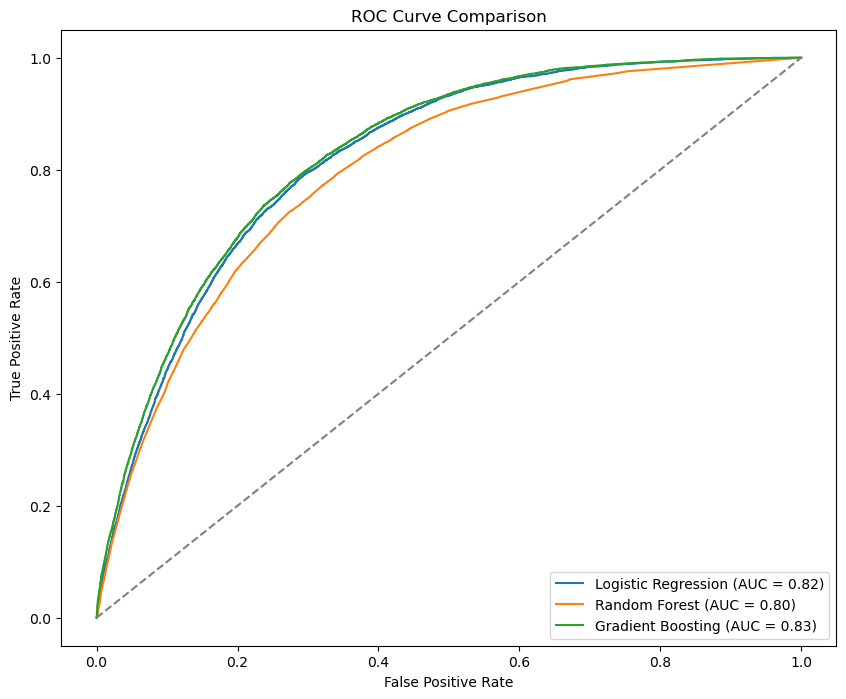

In [24]:
# Plot ROC Curve for each model
def plot_roc_curve(model_name, y_test, predictions):
    fpr, tpr, thresholds = roc_curve(y_test, predictions)
    plt.plot(fpr, tpr, label=f"{model_name} (AUC = {roc_auc_score(y_test, predictions):.2f})")

plt.figure(figsize=(10, 8))
plot_roc_curve("Logistic Regression", data.y_test, lr_clf.predict_proba(data.X_test)[:,1])
plot_roc_curve("Random Forest", data.y_test, rf_clf.predict_proba(data.X_test)[:,1])
plot_roc_curve("Gradient Boosting", data.y_test, gb_clf.predict_proba(data.X_test)[:,1])
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")  # Diagonal line (random guess)
plt.title("ROC Curve Comparison")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()

##### Random Forest Hyperparameter Tuning

In [38]:
# Define parameter distribution for RandomizedSearchCV
param_dist = {
    'n_estimators': np.arange(100, 1000, 100),  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30, 40],  # Max depth of the trees
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4],    # Minimum number of samples required at a leaf node
    'max_features': ['auto', 'sqrt', 'log2'],  # Number of features to consider for each split
    'bootstrap': [True, False]  # Whether to use bootstrap samples
}

# Use RandomizedSearchCV to randomly search hyperparameters
random_search = RandomizedSearchCV(estimator=rf_clf, param_distributions=param_dist, n_iter=10, cv=2, verbose=2, random_state=42)
random_search.fit(data.X_train, data.y_train)

# Best parameters from RandomizedSearchCV
print("Best Parameters from RandomizedSearchCV:", random_search.best_params_)


Fitting 2 folds for each of 10 candidates, totalling 20 fits
[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=600; total time=  45.0s
[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=600; total time=  45.3s
[CV] END bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=800; total time=   0.0s
[CV] END bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=800; total time=   0.0s
[CV] END bootstrap=True, max_depth=40, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=600; total time=  43.5s
[CV] END bootstrap=True, max_depth=40, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=600; total time=  43.5s
[CV] END bootstrap=True, max_depth=40, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators

/home/jake/miniconda3/envs/jup/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
6 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
6 fits failed with the following error:
Traceback (most recent call last):
  File "/home/jake/miniconda3/envs/jup/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/jake/miniconda3/envs/jup/lib/python3.12/site-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/home/jake/miniconda3/envs/jup/lib/python3.12/site-packages/sklearn/base.py", line 436, in _validate_params
    validate_paramete

Best Parameters from RandomizedSearchCV: {'n_estimators': np.int64(600), 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 40, 'bootstrap': True}


In [50]:
best_rf_clf = random_search.best_estimator_
y_pred = best_rf_clf.predict(data.X_test)

evaluate_model("                 Random Forest", data.y_test, rf_data.y_pred)
evaluate_model("Random HP Tuning Random Forest", data.y_test, y_pred)

                 Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.97      0.92     43667
           1       0.48      0.16      0.24      7069

    accuracy                           0.86     50736
   macro avg       0.68      0.57      0.58     50736
weighted avg       0.82      0.86      0.83     50736

------------------------------------------------------------
Random HP Tuning Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.98      0.93     43667
           1       0.57      0.13      0.21      7069

    accuracy                           0.86     50736
   macro avg       0.72      0.56      0.57     50736
weighted avg       0.83      0.86      0.83     50736

------------------------------------------------------------


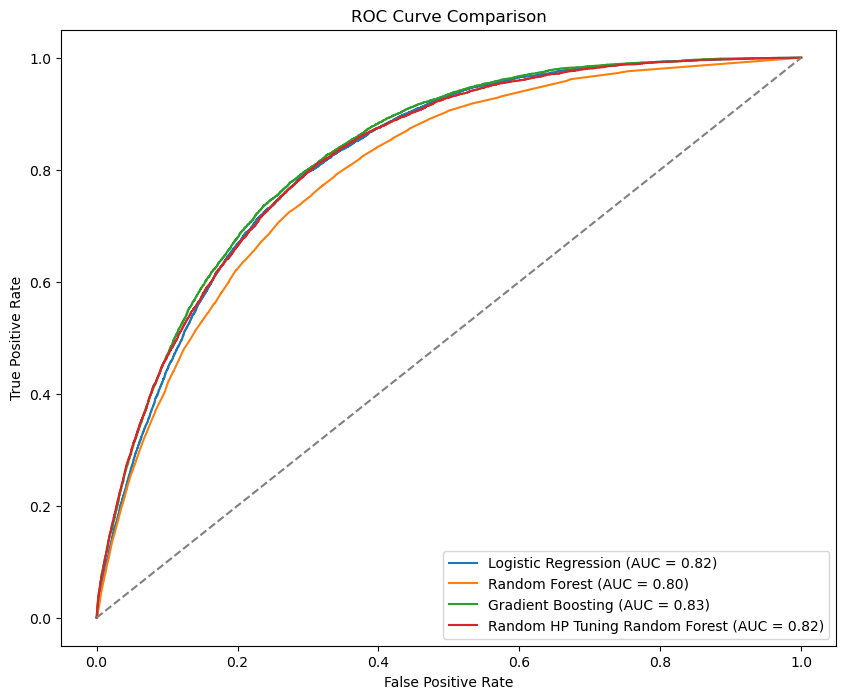

In [49]:
plt.figure(figsize=(10, 8))
plot_roc_curve("Logistic Regression", data.y_test, lr_clf.predict_proba(data.X_test)[:,1])
plot_roc_curve("Random Forest", data.y_test, rf_clf.predict_proba(data.X_test)[:,1])
plot_roc_curve("Gradient Boosting", data.y_test, gb_clf.predict_proba(data.X_test)[:,1])
plot_roc_curve("Random HP Tuning Random Forest", data.y_test, best_rf_clf.predict_proba(data.X_test)[:,1])
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")  # Diagonal line (random guess)
plt.title("ROC Curve Comparison")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()

### Conclusions

Plotting the Feature Importances from the hyperparameter randomly tuned Random Forest model shows that the features with the largest impact on the model's decision making process are BMI, General Health sentiment, Age, and High Blood Pressure. Overall this was a highly enjoyable project to work on. It forced me to explore and utilize many features of Scikit-Learn that I haven't used on my own before. I am excited to continue my learning journey with the next courses in the Machine Learning specialization.

<Figure size 640x480 with 0 Axes>

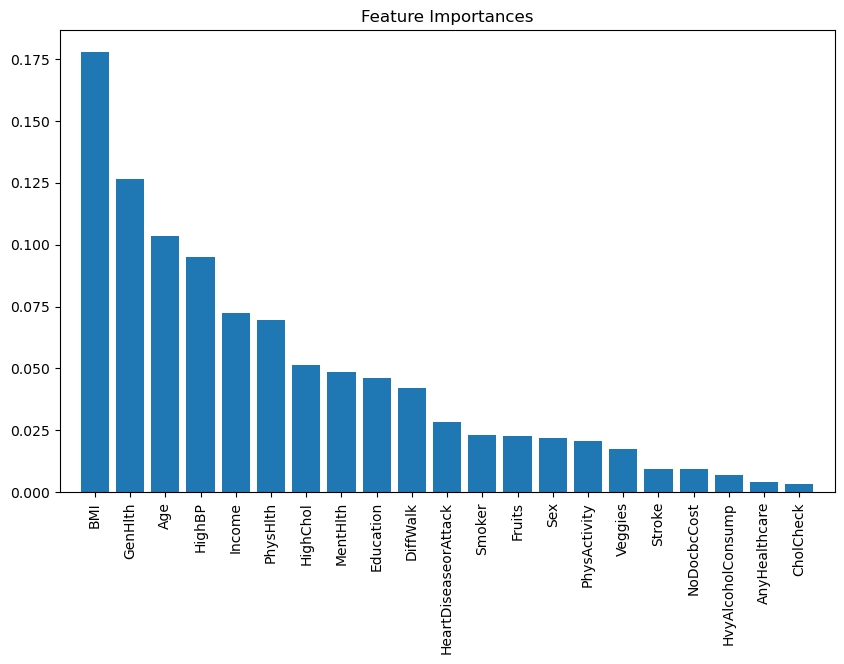

In [48]:
importances = best_rf_clf.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Plot feature importances
plt.clf()
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(data.X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(data.X_train.shape[1]), data.X_train.columns[indices], rotation=90)
plt.xlim([-1, data.X_train.shape[1]])
plt.show()

#### Future Work/Improvements

Continue to iterate on tuning the models for a better fit and hopefully a better prediction. Use additional hyperparameter tuning techniques with more computational capability.

### Sources

[UC Irvine Machine Learning Repository](https://archive.ics.uci.edu/dataset/891/cdc+diabetes+health+indicators)

[Kaggle Project](https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset/data?select=diabetes_012_health_indicators_BRFSS2015.csv)

[Original Dataset Source](https://www.kaggle.com/datasets/cdc/behavioral-risk-factor-surveillance-system)

Behavioral Risk Factor Surveillance System (BRFSS): The objective of the BRFSS is to collect uniform, state-specific data on preventive health practices and risk
behaviors that are linked to chronic diseases, injuries, and preventable infectious diseases in the adult population.
Factors assessed by the BRFSS include tobacco use, health care coverage, HIV/AIDS knowledge or prevention,
physical activity, and fruit and vegetable consumption. Data are collected from a random sample of adults (one per
household) through a telephone survey.